In [1]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np

In [2]:
df_orig = pd.read_csv('final_dataset.csv')
df_orig.head()

,Unnamed: 0,CNTY_NM,TRFC_STATN_ID,AADT_RPT_QTY,AADT_RPT_HIST_05_QTY,LATITUDE,LONGITUDE,5Yr_Growth,Wildfire_Risk,City,RISK_STATE_RANK
0,1,Hays,106D1,38211,38153.000000,30.210039,-97.970490,0.001520,Minimal Direct Wildfire Impacts,Austin,0.422
1,4,Hays,106D11NBSR,5498,5391.000000,30.084819,-97.820503,0.019848,Minimal Direct Wildfire Impacts,Buda,0.423
2,6,Hays,106D14NBSR,18543,18966.000000,30.007955,-97.863137,-0.022303,Minimal Direct Wildfire Impacts,Kyle,0.458
3,7,Hays,106D15SBSR,6292,5719.000000,29.877053,-97.906268,0.100192,Minimal Direct Wildfire Impacts,San Marcos,0.346
4,8,Hays,106D17SBSR,17584,16387.728588,30.010080,-97.862877,0.072998,Minimal Direct Wildfire Impacts,Kyle,0.458


In [3]:
df_new = pd.read_csv('final_scaled 1.csv')
df_new.head()

,CNTY_NM,City,LATITUDE,LONGITUDE,Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score
0,Hays,Austin,30.210039,-97.970490,0,0.519260,0.200623,0.138364,0.205548
1,Hays,Buda,30.084819,-97.820503,0,0.520801,0.028831,0.143494,0.155858
2,Hays,Kyle,30.007955,-97.863137,0,0.574730,0.097336,0.131696,0.183656
3,Hays,San Marcos,29.877053,-97.906268,0,0.402157,0.033000,0.165981,0.140126
4,Hays,Kyle,30.010080,-97.862877,0,0.574730,0.092300,0.158370,0.190147


In [4]:
df = df_orig.merge(df_new,how='inner',left_index=True,right_index=True)[['CNTY_NM_x','City_x','LATITUDE_x','LONGITUDE_x',
                                                                         'AADT_RPT_QTY','AADT_RPT_HIST_05_QTY','5Yr_Growth','Wildfire_Risk_y',
                                                                         'RISK_STATE_RANK_Scaled','AADT_RPT_QTY_Scaled','5Yr_Growth_Scaled','Gridlock_Risk_Score']]
df.columns = ['County','City','LATITUDE','LONGITUDE','AADT_RPT_QTY','AADT_RPT_HIST_05_QTY','5Yr_Growth','Direct_Road_Wildfire_Risk',
              'RISK_STATE_RANK_Scaled','AADT_RPT_QTY_Scaled','5Yr_Growth_Scaled','Gridlock_Risk_Score']
df.head()

,County,City,LATITUDE,LONGITUDE,AADT_RPT_QTY,AADT_RPT_HIST_05_QTY,5Yr_Growth,Direct_Road_Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score
0,Hays,Austin,30.210039,-97.970490,38211,38153.000000,0.001520,0,0.519260,0.200623,0.138364,0.205548
1,Hays,Buda,30.084819,-97.820503,5498,5391.000000,0.019848,0,0.520801,0.028831,0.143494,0.155858
2,Hays,Kyle,30.007955,-97.863137,18543,18966.000000,-0.022303,0,0.574730,0.097336,0.131696,0.183656
3,Hays,San Marcos,29.877053,-97.906268,6292,5719.000000,0.100192,0,0.402157,0.033000,0.165981,0.140126
4,Hays,Kyle,30.010080,-97.862877,17584,16387.728588,0.072998,0,0.574730,0.092300,0.158370,0.190147


<Axes: ylabel='Density'>

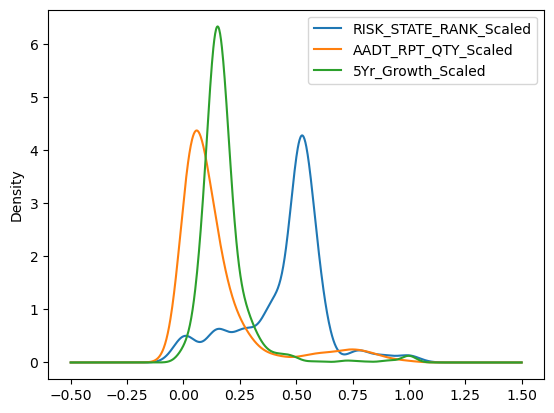

In [5]:
df[['RISK_STATE_RANK_Scaled','AADT_RPT_QTY_Scaled','5Yr_Growth_Scaled']].plot(kind='density')

<Axes: xlabel='Direct_Road_Wildfire_Risk'>

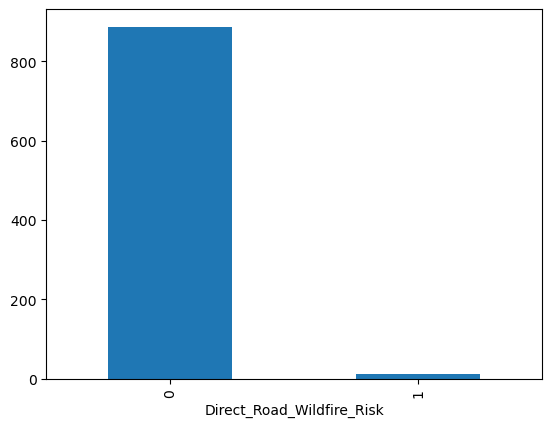

In [6]:
df['Direct_Road_Wildfire_Risk'].value_counts().plot(kind='bar')

In [7]:
df_cities = df[['City','RISK_STATE_RANK_Scaled']].groupby(['City']).mean().reset_index()
df_cities.head()

,City,RISK_STATE_RANK_Scaled
0,Austin,0.519260
1,Bastrop,0.255778
2,Buda,0.520801
3,Cedar Park,0.583975
4,Dripping Springs,0.885978


In [8]:
# https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_48_place_500k.zip
city_geo = gpd.read_file('cb_2023_48_place_500k/cb_2023_48_place_500k.shp')
# city_geo['GEOID'] = city_geo['GEOID'].astype(str).str.strip()

merged_geo_df = city_geo.merge(df_cities, left_on='NAME', right_on='City')
merged_geo_df.head()

,STATEFP,PLACEFP,PLACENS,GEOIDFQ,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry,City,RISK_STATE_RANK_Scaled
0,48,65600,02411798,1600000US4865600,4865600,San Marcos,San Marcos city,TX,Texas,25,100676118,347760,"MULTIPOLYGON (((-97.86296 29.92244, -97.86157 ...",San Marcos,0.402157
1,48,13552,02409418,1600000US4813552,4813552,Cedar Park,Cedar Park city,TX,Texas,25,66304255,515207,"MULTIPOLYGON (((-97.84261 30.46221, -97.83602 ...",Cedar Park,0.583975
2,48,42016,02410812,1600000US4842016,4842016,Leander,Leander city,TX,Texas,25,100197360,526900,"MULTIPOLYGON (((-97.78078 30.56952, -97.77998 ...",Leander,0.775039
3,48,71948,02412035,1600000US4871948,4871948,Taylor,Taylor city,TX,Texas,25,58383352,302431,"POLYGON ((-97.51247 30.60110, -97.50511 30.603...",Taylor,0.000000
4,48,39952,02411564,1600000US4839952,4839952,Kyle,Kyle city,TX,Texas,25,84052555,550298,"MULTIPOLYGON (((-97.82198 29.93797, -97.81842 ...",Kyle,0.574730


In [9]:
merged_geo_df.explore(column='RISK_STATE_RANK_Scaled', cmap='inferno', legend=True)

In [10]:
# Weights
current_traffic_wt = .3
traffic_growth_wt = .3
local_risk_wt = .2
city_risk_wt = .2
df['Gridlock_Risk_Score'] = (df['Direct_Road_Wildfire_Risk']*local_risk_wt + 
df['RISK_STATE_RANK_Scaled']*city_risk_wt +
df['AADT_RPT_QTY_Scaled']*current_traffic_wt +
df['5Yr_Growth_Scaled']*traffic_growth_wt)

In [11]:
df['Direct_Road_Wildfire_Risk'] = ['Yes' if x == 1 else 'No' for x in df['Direct_Road_Wildfire_Risk']]
df['5Yr_Growth'] = (df['5Yr_Growth']*100).map("{:.2f}%".format)

In [12]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']))
gdf.head()

,County,City,LATITUDE,LONGITUDE,AADT_RPT_QTY,AADT_RPT_HIST_05_QTY,5Yr_Growth,Direct_Road_Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score,geometry
0,Hays,Austin,30.210039,-97.970490,38211,38153.000000,0.15%,No,0.519260,0.200623,0.138364,0.205548,POINT (-97.97049 30.21004)
1,Hays,Buda,30.084819,-97.820503,5498,5391.000000,1.98%,No,0.520801,0.028831,0.143494,0.155858,POINT (-97.82050 30.08482)
2,Hays,Kyle,30.007955,-97.863137,18543,18966.000000,-2.23%,No,0.574730,0.097336,0.131696,0.183656,POINT (-97.86314 30.00795)
3,Hays,San Marcos,29.877053,-97.906268,6292,5719.000000,10.02%,No,0.402157,0.033000,0.165981,0.140126,POINT (-97.90627 29.87705)
4,Hays,Kyle,30.010080,-97.862877,17584,16387.728588,7.30%,No,0.574730,0.092300,0.158370,0.190147,POINT (-97.86288 30.01008)


<Axes: ylabel='Density'>

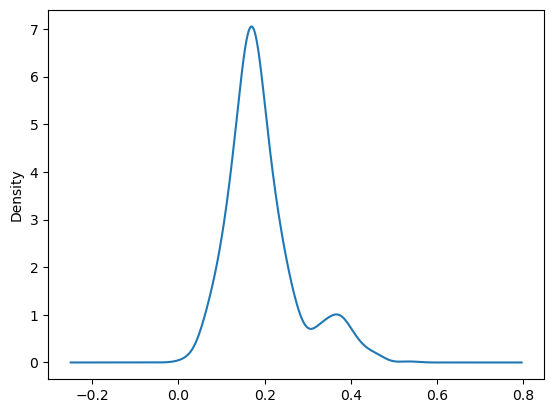

In [13]:
gdf['Gridlock_Risk_Score'].plot(kind='density')

In [14]:
def std_dev_binning(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    bin_edges = [mean - 2*std_dev, mean - std_dev, mean, mean + std_dev, mean + 2*std_dev]
    bin_edges = [float('-inf')] + bin_edges + [float('inf')]
    return bin_edges

bin_edges = std_dev_binning(gdf['Gridlock_Risk_Score'])
bin_labels = ['Very Low', 'Low', 'Average', 'High', 'Very High', 'Extremely High']
print(bin_edges)

[-inf, 0.030875441370993878, 0.11200146544015971, 0.19312748950932554, 0.27425351357849137, 0.3553795376476572, inf]


In [15]:
gdf['Gridlock_Risk_label'] = pd.cut(gdf['Gridlock_Risk_Score'], bins=bin_edges, labels=bin_labels)
gdf.head()

,County,City,LATITUDE,LONGITUDE,AADT_RPT_QTY,AADT_RPT_HIST_05_QTY,5Yr_Growth,Direct_Road_Wildfire_Risk,RISK_STATE_RANK_Scaled,AADT_RPT_QTY_Scaled,5Yr_Growth_Scaled,Gridlock_Risk_Score,geometry,Gridlock_Risk_label
0,Hays,Austin,30.210039,-97.970490,38211,38153.000000,0.15%,No,0.519260,0.200623,0.138364,0.205548,POINT (-97.97049 30.21004),High
1,Hays,Buda,30.084819,-97.820503,5498,5391.000000,1.98%,No,0.520801,0.028831,0.143494,0.155858,POINT (-97.82050 30.08482),Average
2,Hays,Kyle,30.007955,-97.863137,18543,18966.000000,-2.23%,No,0.574730,0.097336,0.131696,0.183656,POINT (-97.86314 30.00795),Average
3,Hays,San Marcos,29.877053,-97.906268,6292,5719.000000,10.02%,No,0.402157,0.033000,0.165981,0.140126,POINT (-97.90627 29.87705),Average
4,Hays,Kyle,30.010080,-97.862877,17584,16387.728588,7.30%,No,0.574730,0.092300,0.158370,0.190147,POINT (-97.86288 30.01008),Average


In [16]:
m = merged_geo_df.explore(column='RISK_STATE_RANK_Scaled', cmap='inferno', legend=True, name="cities")
m = gdf.explore(m=m, column="Gridlock_Risk_label", cmap=['purple','blue','green','yellow','orange','red'], name="points")
folium.LayerControl().add_to(m)

m